 # Business Problem Understanding

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form These details are Gender, Marital Status, Education. Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [81]:
data=pd.read_csv("LoanData.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Understanding
• Loan ID: Unique Loan ID

Gender: Male/Female

• Married Applicant married

• Dependents Number of dependents

• Education: Applicant Education

. Self_Employed whether the applicant is Self employed

• Applicantincome. Applicant income

• Coapplicantincome: Coapplicant income

• LoanAmount Loan amount in thousands

• Loan Amount Term Term of loan in months

• Credit History credit history meets guidelines

• Property Area Urban/ Semi Urbany Rural

• Loan Status: Loan approved target variable

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [83]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [84]:
data['Loan_ID'].nunique()

614

Drop unimportant columns as per feature selection(filter methods)

In [85]:
data.drop(columns=['Loan_ID'],inplace=True)

In [86]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [87]:
data['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [88]:
data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [89]:
data['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [90]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [91]:
data['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [92]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [93]:
data['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [94]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [95]:
data['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [96]:
data['CoapplicantIncome'].unique()

array([0.00000000e+00, 1.50800000e+03, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 1.84000000e+03, 8.10600000e+03, 2.84000000e+03,
       1.08600000e+03, 3.50000000e+03, 5.62500000e+03, 1.91100000e+03,
       1.91700000e+03, 2.92500000e+03, 2.25300000e+03, 1.04000000e+03,
       2.08300000e+03, 3.36900000e+03, 1.66700000e+03, 3.00000000e+03,
       2.06700000e+03, 1.33000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 2.16600000e+03, 1.88100000e+03, 2.53100000e+03,
       2.00000000e+03, 2.11800000e+03, 4.16700000e+03, 2.90000000e+03,
      

In [97]:
data['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [98]:
data['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [99]:
data['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [100]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [101]:
data['Credit_History']=data['Credit_History'].replace({1:'good',0:'bad'})

In [102]:
data['Credit_History'].unique()

array(['good', 'bad', nan], dtype=object)

In [103]:
data['Credit_History'].value_counts()

Credit_History
good    475
bad      89
Name: count, dtype: int64

In [104]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [105]:
data['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [106]:
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [107]:
data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [108]:
continous=['ApplicantIncome','CoapplicantIncome','LoanAmount']
discrete_categorical=['Gender','Married','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']
discrete_count=['Dependents','Loan_Amount_Term']

# Exploratory Data Analysis(EDA)

for continous Variables

In [109]:
data[continous].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


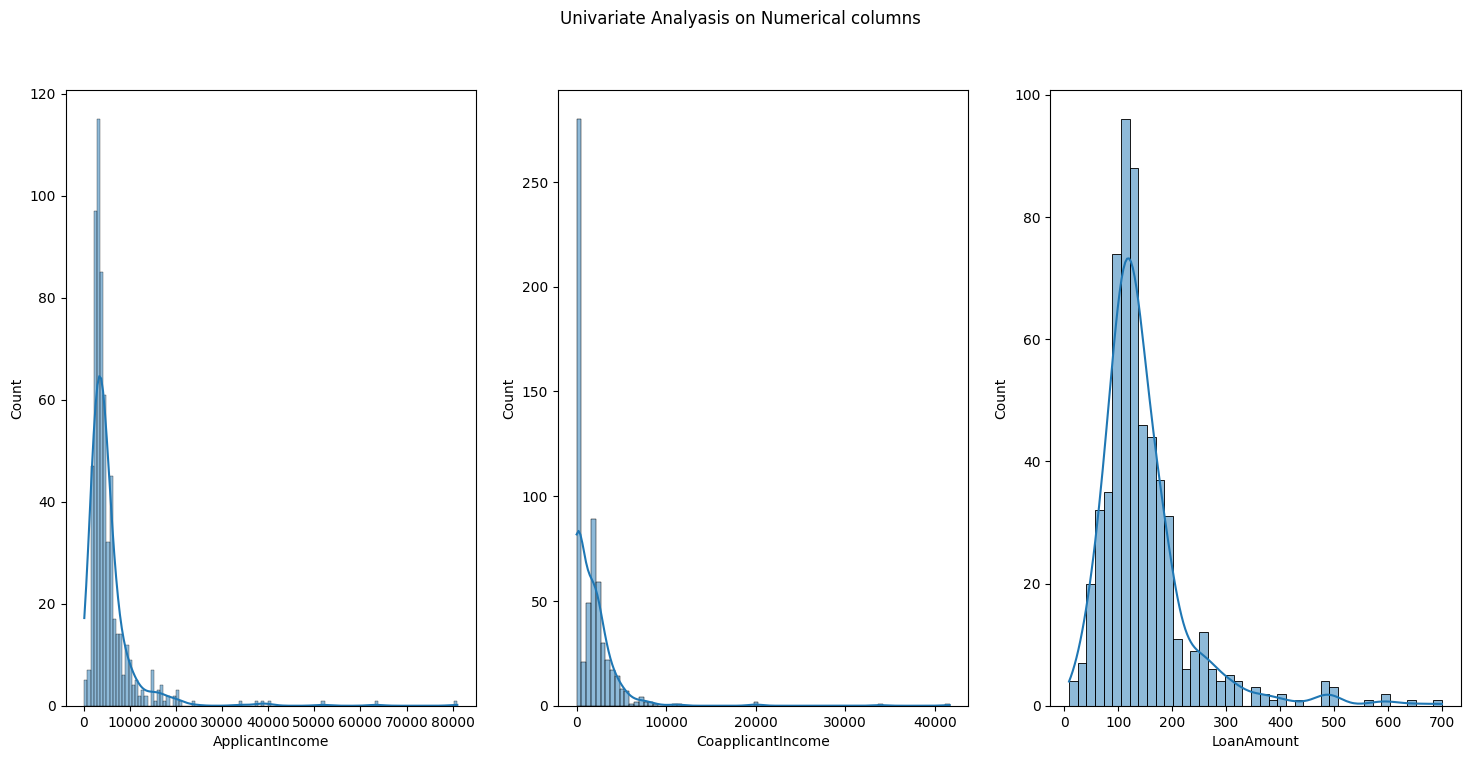

In [110]:
plt.rcParams['figure.figsize']=(18,8)

plt.subplot(1,3,1)
sns.histplot(data['ApplicantIncome'],kde=True)

plt.subplot(1,3,2)
sns.histplot(data['CoapplicantIncome'],kde=True)

plt.subplot(1,3,3)
sns.histplot(data['LoanAmount'],kde=True)

plt.suptitle('Univariate Analyasis on Numerical columns')
plt.show()

In [111]:
data[continous].skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
dtype: float64

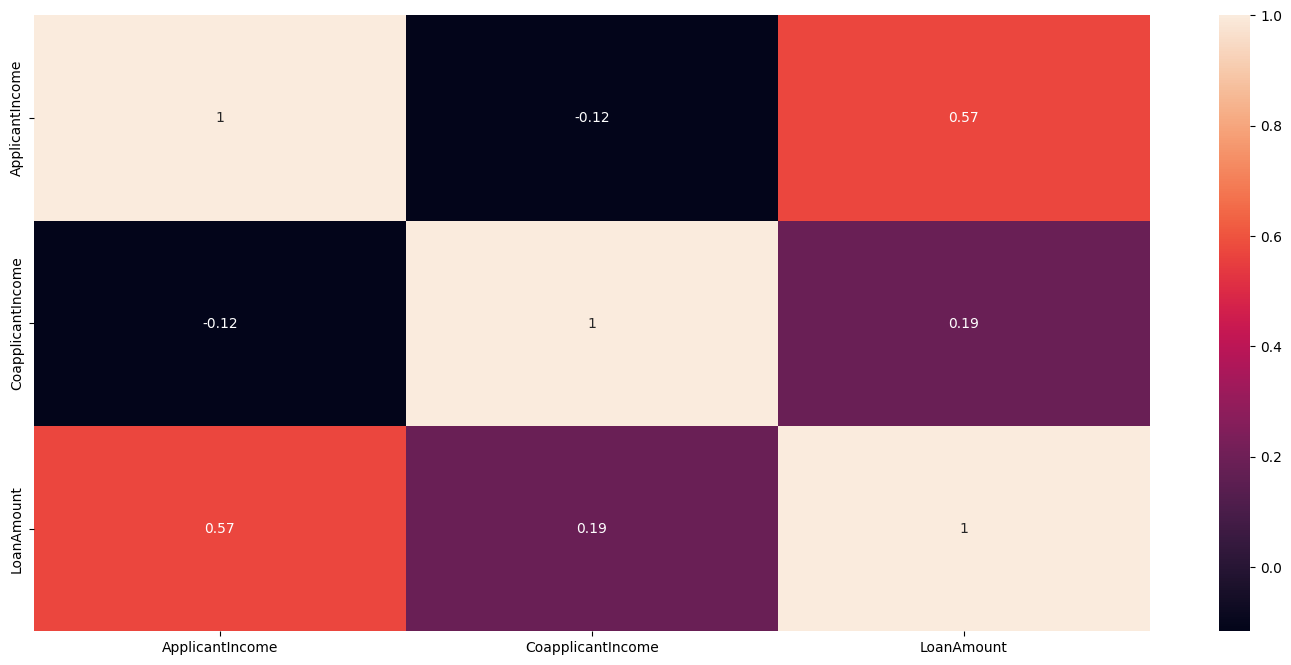

In [112]:
sns.heatmap(data[continous].corr(),annot=True)
plt.show()

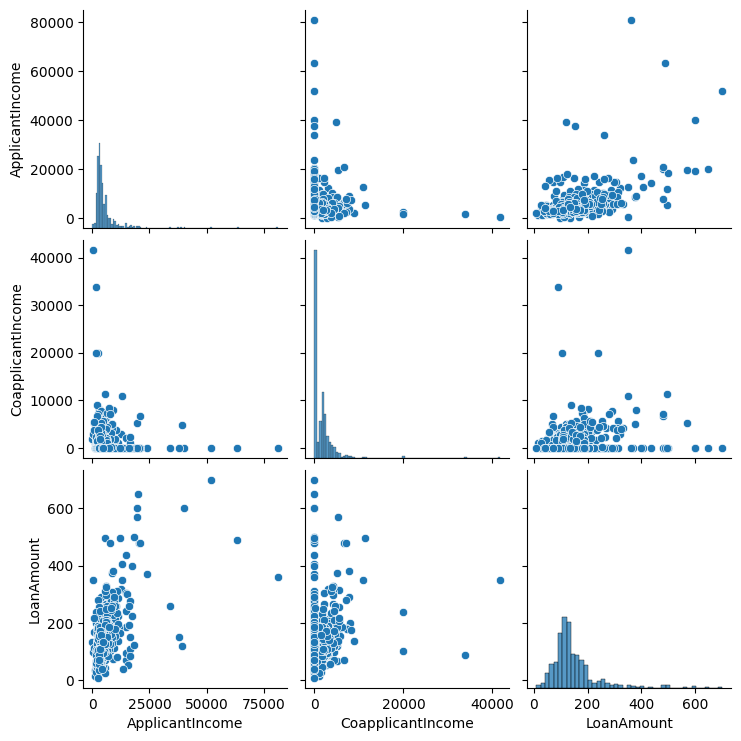

In [113]:
sns.pairplot(data[continous])
plt.show()

For discrete Variables

In [114]:
data[discrete_categorical].describe()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,614,582,564,614,614
unique,2,2,2,2,2,3,2
top,Male,Yes,Graduate,No,good,Semiurban,Y
freq,489,398,480,500,475,233,422


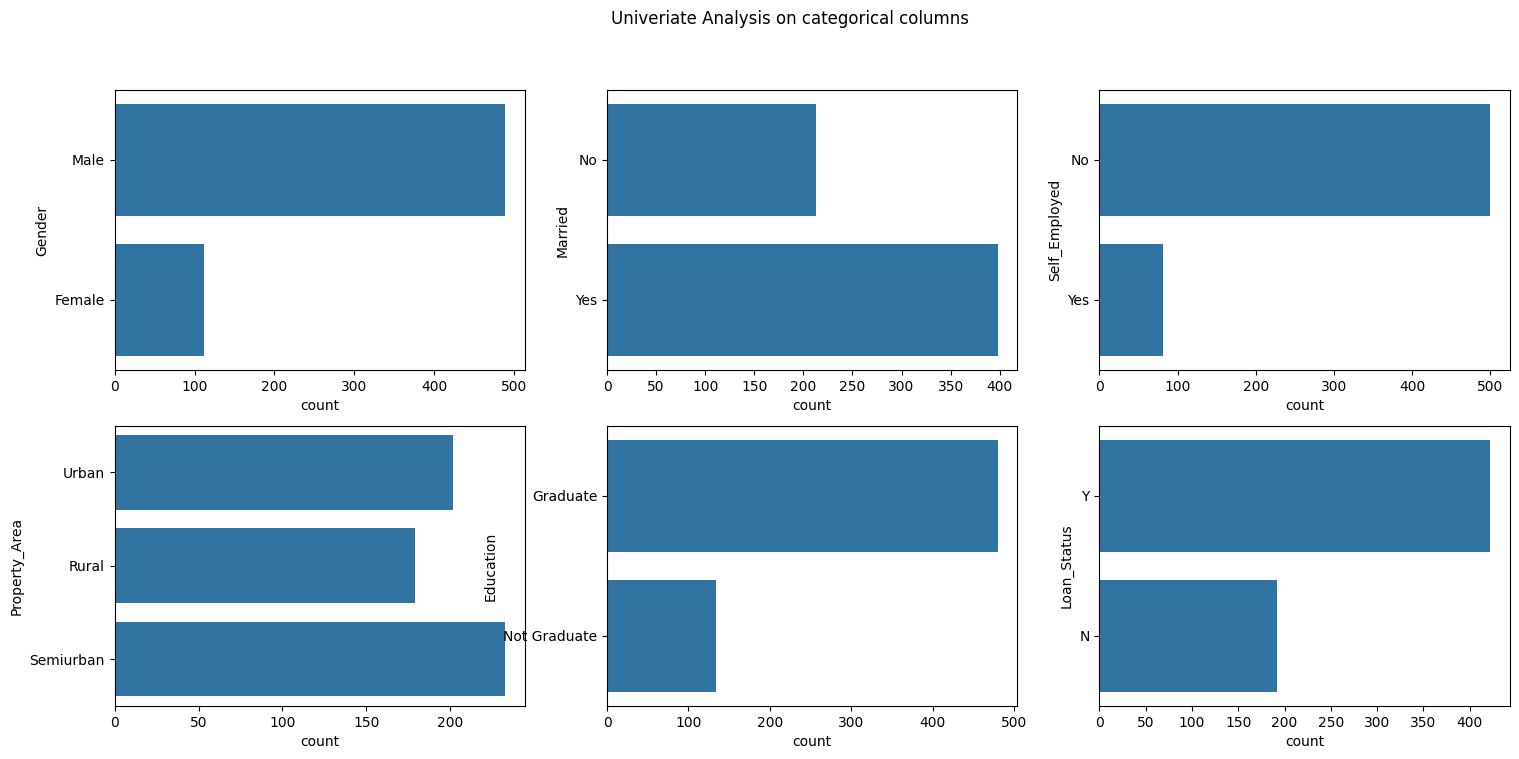

In [115]:
plt.rcParams['figure.figsize']=(18,8)

plt.subplot(2,3,1)
sns.countplot(data['Gender'])

plt.subplot(2,3,2)
sns.countplot(data['Married'])

plt.subplot(2,3,3)
sns.countplot(data['Self_Employed'])

plt.subplot(2,3,4)
sns.countplot(data['Property_Area'])

plt.subplot(2,3,5)
sns.countplot(data['Education'])

plt.subplot(2,3,6)
sns.countplot(data['Loan_Status'])

plt.suptitle('Univeriate Analysis on categorical columns')
plt.show()

In [116]:
#lets compare all the categories with respect to the loan status to understand the overall

print("Impact of Marriage on Loan Status")
print(pd.crosstab(data['Loan_Status'],data["Married"]))
print("\n")

print("Impact of Dependents on Loan Status")
print(pd.crosstab(data['Loan_Status'],data["Dependents"]))
print("\n")

print("Impact of Education on Loan Status")
print(pd.crosstab(data['Loan_Status'],data["Education"]))
print("\n")

print("Impact of Employment on Loan Status")
print(pd.crosstab(data['Loan_Status'],data["Self_Employed"]))
print("\n")




Impact of Marriage on Loan Status
Married       No  Yes
Loan_Status          
N             79  113
Y            134  285


Impact of Dependents on Loan Status
Dependents     0   1   2  3+
Loan_Status                 
N            107  36  25  18
Y            238  66  76  33


Impact of Education on Loan Status
Education    Graduate  Not Graduate
Loan_Status                        
N                 140            52
Y                 340            82


Impact of Employment on Loan Status
Self_Employed   No  Yes
Loan_Status            
N              157   26
Y              343   56




Check for missing values

In [117]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Check for skewness

In [118]:
data[continous].skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
dtype: float64

Check outliers

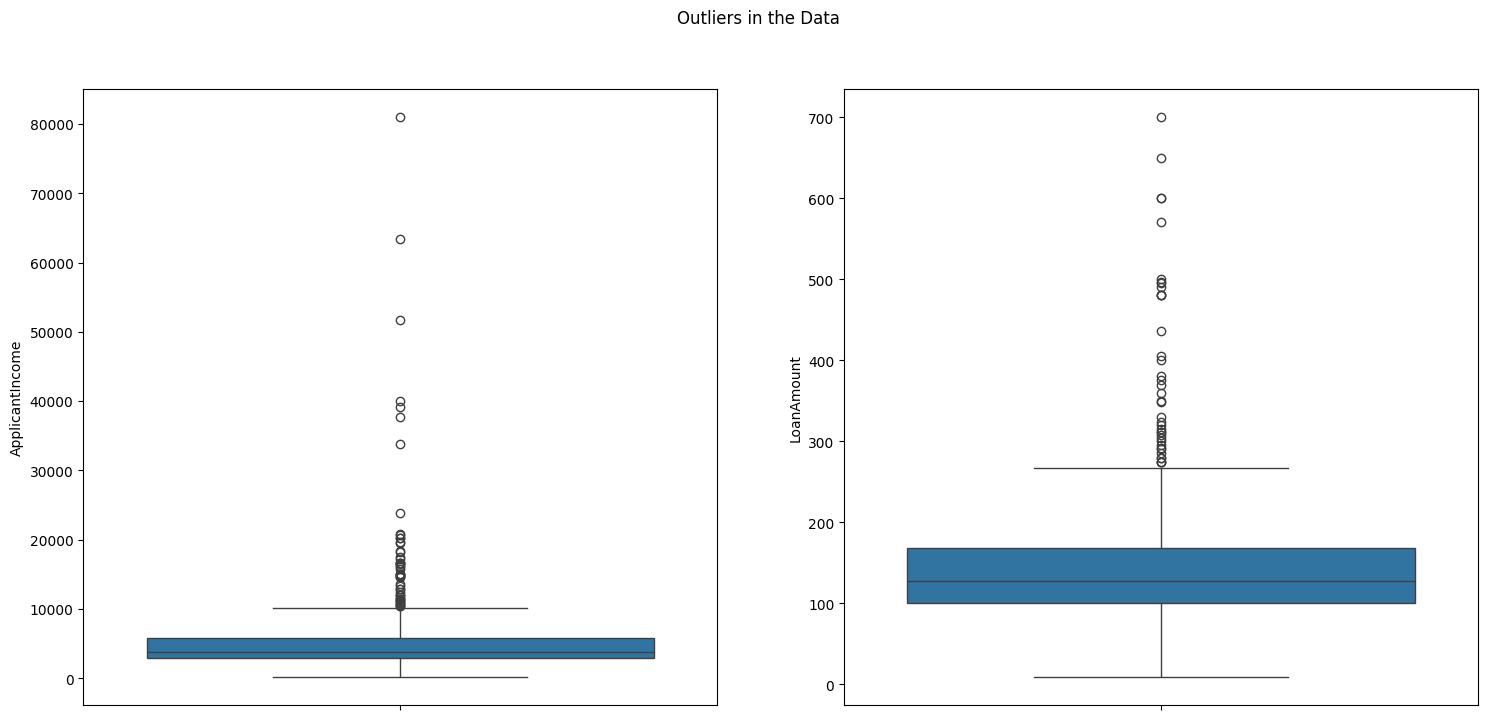

In [119]:
#Lets visualize the outliers using Box Plot

plt.subplot(1,2,1)
sns.boxplot(data['ApplicantIncome'])

plt.subplot(1,2,2)
sns.boxplot(data['LoanAmount'])

plt.suptitle('Outliers in the Data')
plt.show()

Stage 3:Data Preparation

Wrong Data treatment

In [120]:
data['Dependents']=data['Dependents'].replace({'3+':3})

Missing Values Treatment

In [121]:
data['Dependents']=data['Dependents'].fillna(0)

data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

data=data.dropna(subset=["ApplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"])

data type conversion

In [122]:
data['Dependents']=data['Dependents'].astype('int')
data['Loan_Amount_Term']=data['Loan_Amount_Term'].astype('int')

Encoding

In [123]:
data["Gender"]=data["Gender"].replace({'Male':1,'Female':0})
data["Married"]=data["Married"].replace({'Yes':1,'No':0})
data["Education"]=data["Education"].replace({'Graduate':1,'Not Graduate':0})
data["Self_Employed"]=data["Self_Employed"].replace({'Yes':1,'No':0})
data["Property_Area"]=data["Property_Area"].replace({'Rural':0,'Semiurban':1,'Urban':2})
data["Credit_History"]=data["Credit_History"].replace({'good':1,'bad':0})
data["Loan_Status"]=data["Loan_Status"].replace({'Y':1,'N':0})

transformations

In [124]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable




[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [125]:
from scipy.stats import boxcox
data['ApplicantIncome'],a=boxcox(data['ApplicantIncome'])
data["LoanAmount"],c=boxcox(data['LoanAmount'])

In [126]:
data['Loan_Amount_Term']=data['Loan_Amount_Term']/12

x&y

In [127]:
X=data.drop('Loan_Status',axis=1)
y=data['Loan_Status']

Train-test split

In [128]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [129]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [130]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

1.Logistic Regression

In [132]:
#Modeling
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

#Predict & evaluate on train data
ypred_train=log_model.predict(X_train)
print("Train Accuracy:",accuracy_score(y_train,ypred_train))

#Cross Validation on Train data
print("CV Score:",cross_val_score(log_model,X_train,y_train,cv=5,scoring="accuracy"))

#predict & evaluation on test data
ypred_test=log_model.predict(X_test)
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

Train Accuracy: 0.806146572104019
CV Score: [0.8        0.82352941 0.77647059 0.77380952 0.83333333]
Test Accuracy: 0.8301886792452831


In [133]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

[[13 13]
 [ 5 75]]
              precision    recall  f1-score   support

           0       0.72      0.50      0.59        26
           1       0.85      0.94      0.89        80

    accuracy                           0.83       106
   macro avg       0.79      0.72      0.74       106
weighted avg       0.82      0.83      0.82       106



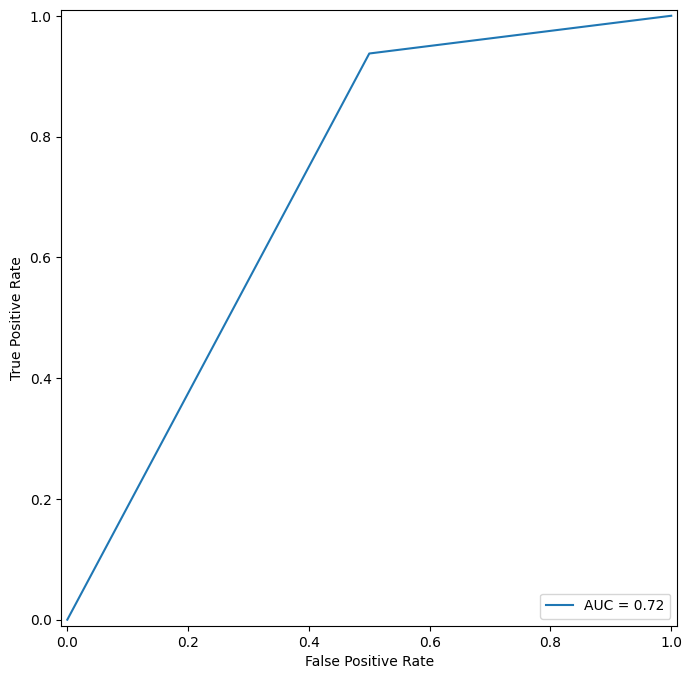

In [134]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay

fpr,tpr,thresholds=roc_curve(y_test,ypred_test)
roc_auc=auc(fpr,tpr)
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()
plt.show()

In [135]:
#AUC Score
from sklearn.metrics import roc_auc_score
print("AUc Score:",roc_auc_score(y_test,ypred_test))

AUc Score: 0.71875


2.KNN

In [136]:
#Hyperparameter tuning
estimator=KNeighborsClassifier()
param_grid={'n_neighbors':list(range(1,50)),"p":[1,2]}
knn_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
knn_grid.fit(X_train,y_train)

#KNN with best Hyperparameters
knn_grid.best_estimator_

,n_neighbors,18
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,1
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [137]:
#Modeling
knn_model=knn_grid.best_estimator_
knn_model.fit(X_train,y_train)

#Predict and evaluate on train data
ypred_train=knn_model.predict(X_train)
print("Train Accuracy:",accuracy_score(y_train,ypred_train))

#Cross validation on Train data
print("CV Score:",cross_val_score(knn_model,X_train,y_train,cv=5,scoring="accuracy"))

#Predict & Evaluate on test data
ypred_test=knn_model.predict(X_test)
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

Train Accuracy: 0.7281323877068558
CV Score: [0.71764706 0.72941176 0.71764706 0.67857143 0.72619048]
Test Accuracy: 0.7735849056603774


Support Vector Machine

In [138]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Base model
estimator = SVC()

# Parameter grid (fixed typo)
param_grid = {
    'C': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'sigmoid', 'poly']
}

# GridSearchCV
svm_grid = GridSearchCV(
    estimator=estimator,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1   # optional: speeds up computation
)

# Fit model
svm_grid.fit(X_train, y_train)

# SVM with best Hyperparameters



,estimator,SVC()
,param_grid,"{'C': [0.01, 0.1, ...], 'kernel': ['linear', 'rbf', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.1


In [139]:
#Modeling
svm_model=svm_grid.best_estimator_
svm_model.fit(X_train,y_train)

#Predict & Evaluate on train data
ypred_train=svm_model.predict(X_train)
print("Train Accuracy:",accuracy_score(y_train,ypred_train))

#Cross Validation on Train data
print("CV Score:",cross_val_score(svm_model,X_train,y_train,cv=5,scoring="accuracy"))

#Predict & Evaluate on test data
ypred_test=svm_model.predict(X_test)
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

Train Accuracy: 0.8085106382978723
CV Score: [0.82352941 0.82352941 0.77647059 0.78571429 0.83333333]
Test Accuracy: 0.839622641509434


$.Decision Tree Classifier

In [140]:
model=DecisionTreeClassifier(random_state=True)
model.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,True
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


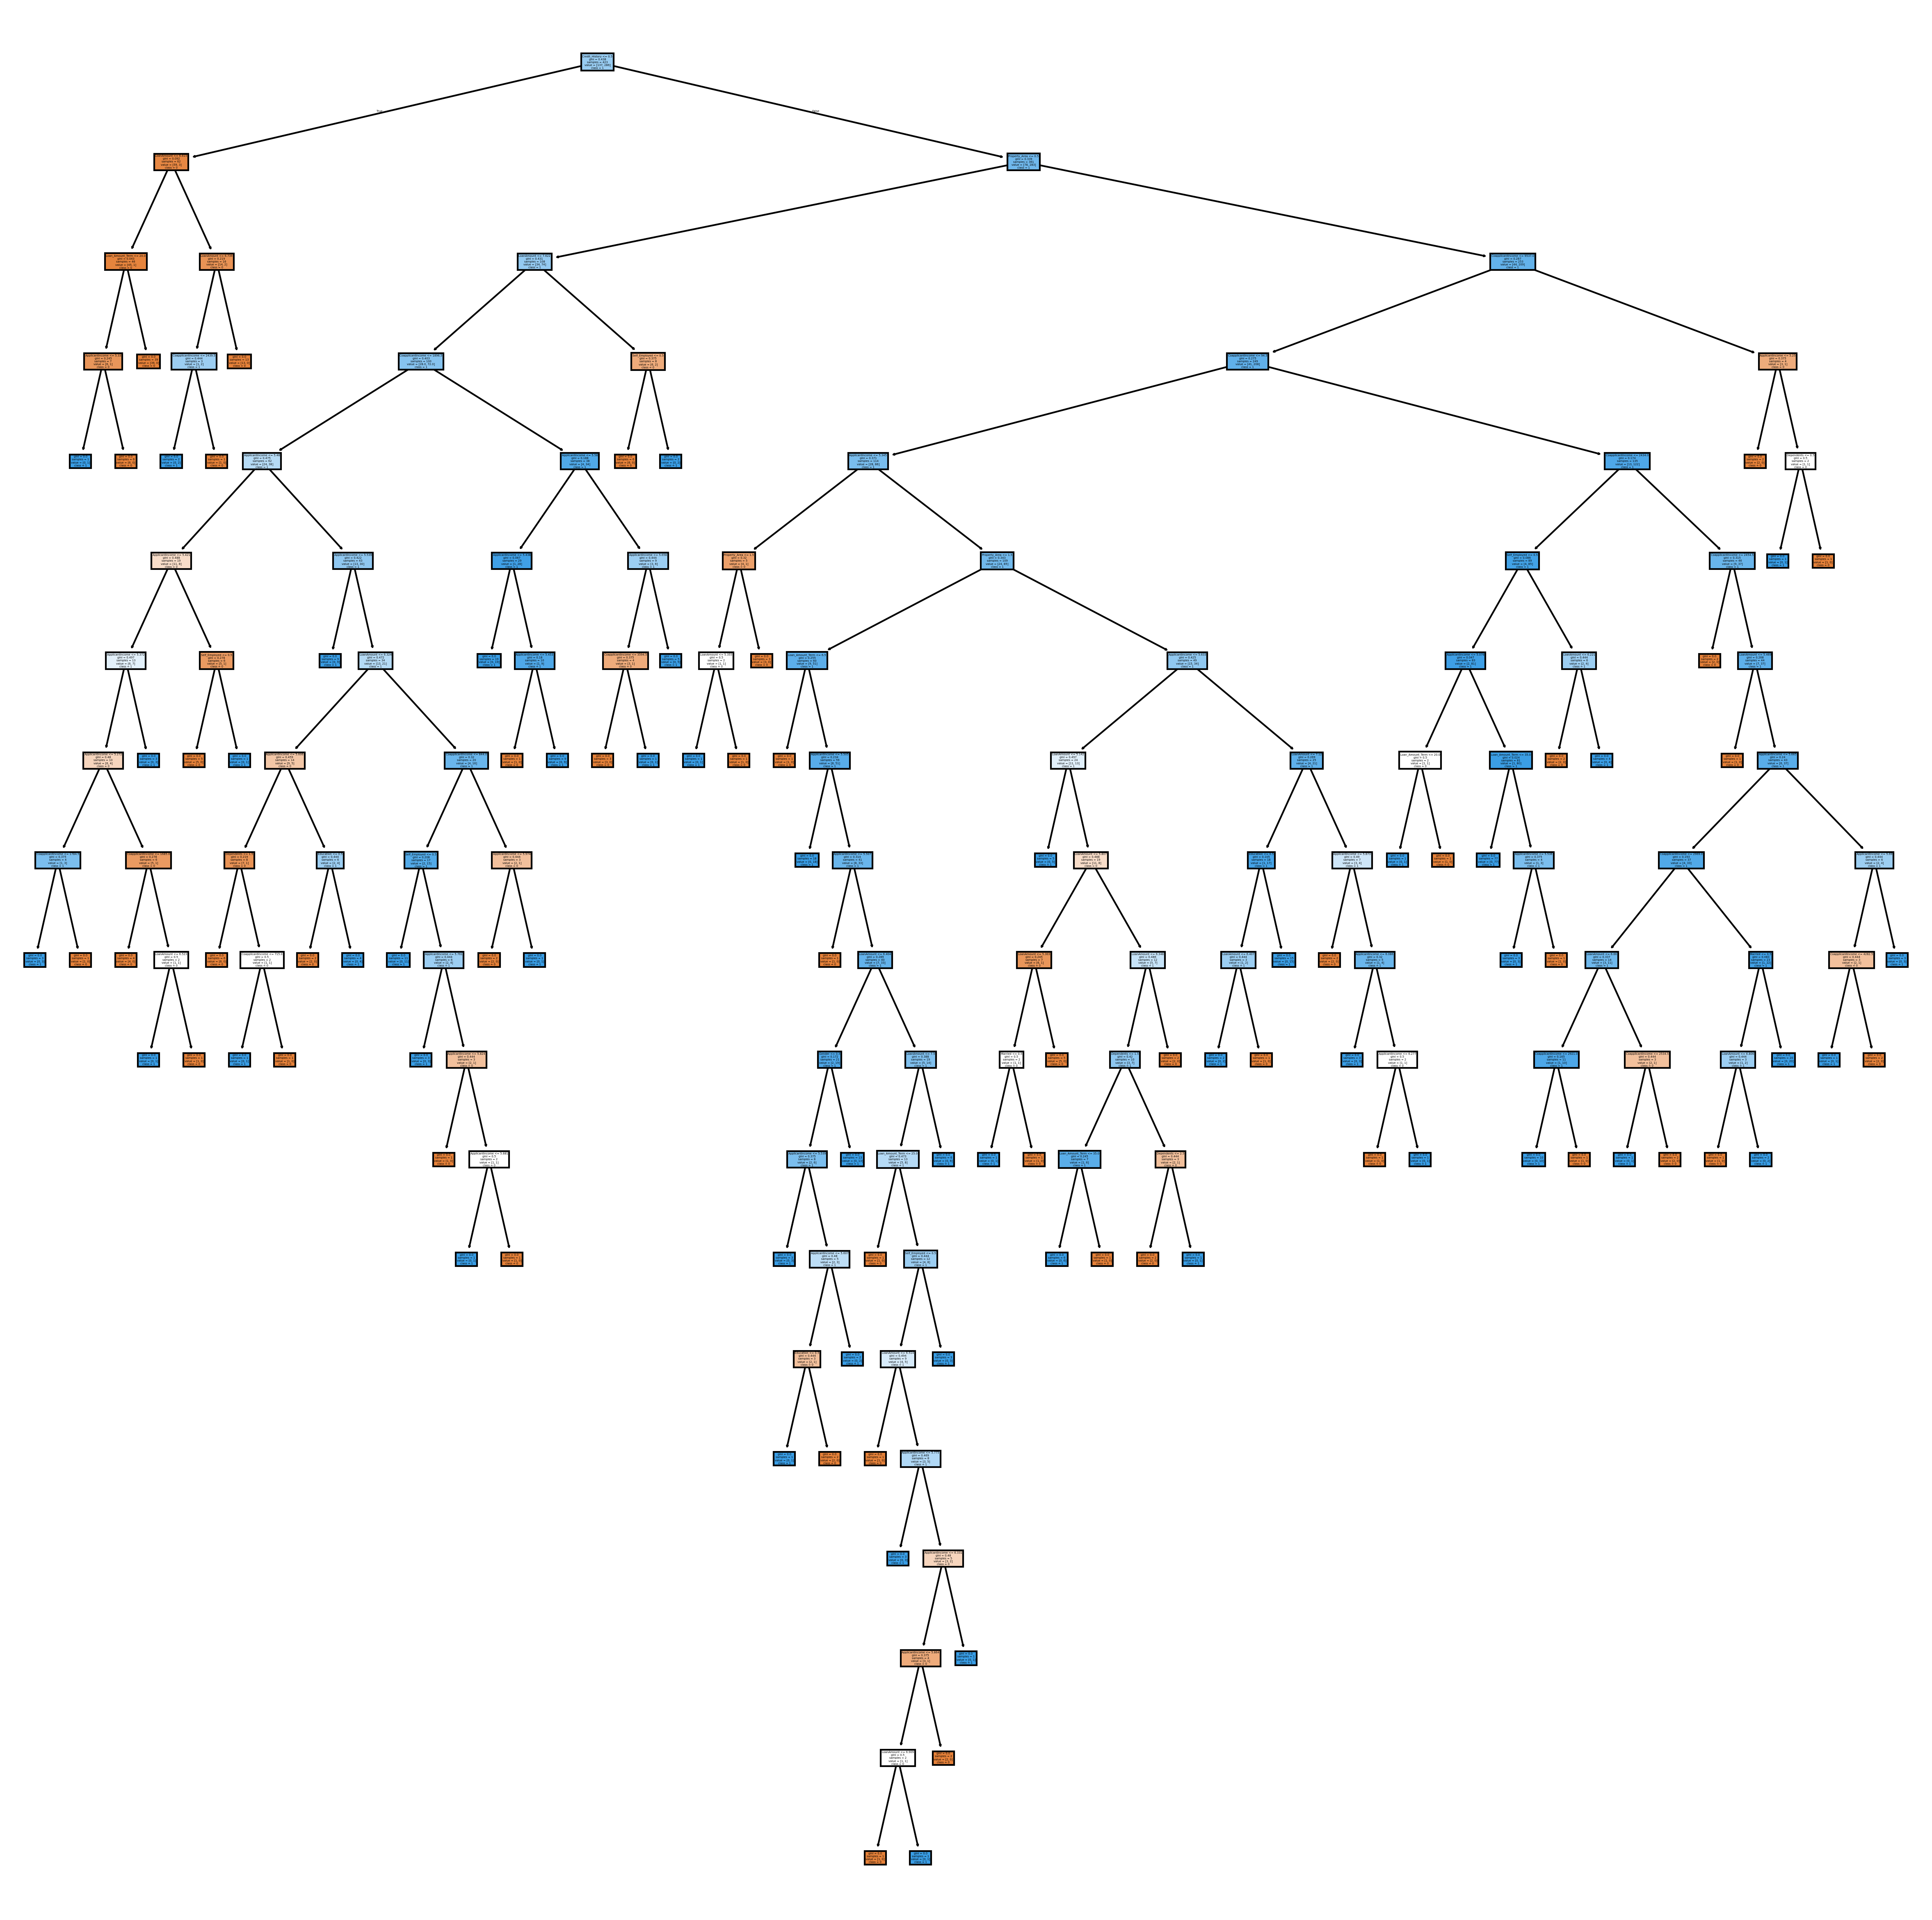

In [141]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20),dpi=300)
plot_tree(model,filled=True,
            feature_names=X_train.columns.tolist(),
            class_names=["0","1"])
plt.show()

In [142]:
#Hper parameter tuning
estimator=DecisionTreeClassifier(random_state=True)

param_grid={'criterion':["gini","entropy"],
            "max_depth":list(range(1,16))}

dt_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
dt_grid.fit(X_train,y_train)

dt=dt_grid.best_estimator_
dt

,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,True
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [143]:
#Important features
feats_ab =pd.DataFrame(data=dt.feature_importances_,
                      index=X.columns,
                      columns=['Importance'])

important_features_dt=feats_ab[feats_ab["Importance"]>0].index.tolist()
important_features_dt                    

['Credit_History']

Creating Decision tree Model with important parameters and important features

In [145]:
#Selecting train & test data
X_train_dt=X_train[important_features_dt]
X_test_dt=X_test[important_features_dt]

#Modeling
dt=dt_grid.best_estimator_
dt.fit(X_train_dt,y_train)

#Evaluation
ypred_train=dt.predict(X_train_dt)
ypred_test=dt.predict(X_test_dt)

print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("CV score:",cross_val_score(dt,X_train_dt,y_train,cv=5,scoring='accuracy').mean())
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

Train Accuracy: 0.8085106382978723
CV score: 0.808515406162465
Test Accuracy: 0.839622641509434


5.Random Forest Classifier

In [146]:
#Hper parameter tuning
estimator=RandomForestClassifier(random_state=True)

param_grid={'n_estimators':list(range(1,51))}

rf_grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
rf_grid.fit(X_train,y_train)

rf=rf_grid.best_estimator_
rf

,n_estimators,11
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [147]:
#important features
feats_ab=pd.DataFrame(data=rf.feature_importances_,
                      index=X.columns,
                      columns=["Importance"])
important_features_rf=feats_ab[feats_ab["Importance"]>0].index.tolist()
important_features_rf

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

In [148]:
X_train_rf=X_train[important_features_rf]
X_test_rf=X_test[important_features_rf]

#Modeling
rf=rf_grid.best_estimator_
rf.fit(X_train_rf,y_train)

#Evaluation
ypred_train=rf.predict(X_train_rf)
ypred_test=rf.predict(X_test_rf)

print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("CV score:",cross_val_score(dt,X_train_rf,y_train,cv=5,scoring='accuracy').mean())
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

Train Accuracy: 0.9858156028368794
CV score: 0.808515406162465
Test Accuracy: 0.8113207547169812


6.AddBoost Classifier

In [150]:
estimator=AdaBoostClassifier(random_state=True)
param_grid={'n_estimators':list(range(1,51))}

ab_grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
ab_grid.fit(X_train,y_train)

ab=ab_grid.best_estimator_
ab

,estimator,None
,n_estimators,21
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,True


In [151]:
#important features
feats_ab=pd.DataFrame(data=ab.feature_importances_,
                      index=X.columns,
                      columns=["Importance"])
important_features_ab=feats_ab[feats_ab["Importance"]>0].index.tolist()
important_features_ab

['Dependents',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

In [152]:
X_train_ab=X_train[important_features_ab]
X_test_ab=X_test[important_features_ab]

#Modeling
ab=ab_grid.best_estimator_
ab.fit(X_train_ab,y_train)

#Evaluation
ypred_train=ab.predict(X_train_ab)
ypred_test=ab.predict(X_test_ab)

print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("CV score:",cross_val_score(ab,X_train_ab,y_train,cv=5,scoring='accuracy').mean())
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

Train Accuracy: 0.8085106382978723
CV score: 0.808515406162465
Test Accuracy: 0.839622641509434


&.Gradient Boost Classifier

In [153]:
estimator=GradientBoostingClassifier(random_state=True)
param_grid={"n_estimators":list(range(1,10)),
            "learning_rate":[0.1,0.2,0.3,0.4,0.5,0.7,0.8,0.9,1.0]}

gb_grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
gb_grid.fit(X_train,y_train)

gb=gb_grid.best_estimator_
gb

,loss,'log_loss'
,learning_rate,0.2
,n_estimators,5
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [154]:
#important features
feats_gb=pd.DataFrame(data=gb.feature_importances_,
                      index=X.columns,
                      columns=["Importance"])
important_features_gb=feats_gb[feats_gb["Importance"]>0].index.tolist()
important_features_gb

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

In [155]:
X_train_gb=X_train[important_features_gb]
X_test_gb=X_test[important_features_gb]

gb=gb_grid.best_estimator_
gb.fit(X_train_gb,y_train)

ypred_train=gb.predict(X_train_gb)
ypred_test=gb.predict(X_test_gb)

print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("CV score:",cross_val_score(gb,X_train_gb,y_train,cv=5,scoring='accuracy').mean())
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

Train Accuracy: 0.8274231678486997
CV score: 0.7990756302521008
Test Accuracy: 0.8301886792452831


8.XGBoost Classifier

In [156]:
#Hperparameter tuning
estimator=XGBClassifier()

param_grid={"n_estimators":[10,20,40,100],
            "max_depth":[3,4,5],
            "gamma":[0,0.15,0.3,0.5,1]}

xgb_grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
xgb_grid.fit(X_train,y_train)

xgb=xgb_grid.best_estimator_
xgb

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [157]:
#Important Features
feats_xgb=pd.DataFrame(data=xgb.feature_importances_,
                       index=X.columns,
                       columns=["Importance"])

important_features_xgb=feats_xgb[feats_xgb["Importance"]>0].index.tolist()
important_features_xgb

['Married',
 'Dependents',
 'Education',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

In [158]:
X_train_xgb=X_train[important_features_xgb]
X_test_xgb=X_test[important_features_xgb]

#Modeling
xgb=xgb_grid.best_estimator_
xgb.fit(X_train_xgb,y_train)

#Evaluation
ypred_train=xgb.predict(X_train_xgb)
ypred_test=xgb.predict(X_test_xgb)

print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("CV score:",cross_val_score(xgb,X_train_xgb,y_train,cv=5,scoring='accuracy').mean())
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

Train Accuracy: 0.8723404255319149
CV score: 0.801344537815126
Test Accuracy: 0.8207547169811321


In [159]:
from joblib import dump
dump(dt,'loan.joblib')

['loan.joblib']

Predict on New data

In [160]:
input_data={"Loan_ID":"LP002991",
            "Gender":"Male",
            "Married":"No",
            "Dependents":1,
            "Education":"Graduate",
            "Self_Employed":"yes",
            "ApplicantIncome":1000,
            "CoapplicantIncome":0,
            "LoanAmount":100,
            "Loan_Amount_Term":240,
            "Credit_History":"bad",
            "Property_Area":"Urban"}

In [161]:
data=pd.DataFrame(input_data,index=[0])
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP002991,Male,No,1,Graduate,yes,1000,0,100,240,bad,Urban


Apply Data preprocesing on Unknown data

In [162]:
data.drop(columns=["Loan_ID"], inplace=True)
data["Income"] = data["ApplicantIncome"] + data["CoapplicantIncome"]
data.drop(columns=["ApplicantIncome", "CoapplicantIncome"], inplace=True)

data["Dependents"] = data["Dependents"].fillna(0)
data["Gender"] = data["Gender"].fillna(data["Gender"].mode()[0])
data["Married"] = data["Married"].fillna(data["Married"].mode()[0])
data["Self_Employed"] = data["Self_Employed"].fillna(data["Self_Employed"].mode()[0])
data = data.dropna(subset=["Income", "LoanAmount", "Loan_Amount_Term", "Credit_History"])

data["Dependents"] = data["Dependents"].astype("int")
data["Loan_Amount_Term"] = data["Loan_Amount_Term"].astype("int")

data["Gender"] = data["Gender"].replace({"Male":1, "Female":0})
data["Married"] = data["Married"].replace({"Yes":1, "No":0})
data["Education"] = data["Education"].replace({"Graduate":1, "Not Graduate":0})
data["Self_Employed"] = data["Self_Employed"].replace({"Yes":1, "No":0})
data["Property_Area"] = data["Property_Area"].replace({"Rural":0, "Semiurban":1, "Urban":2})
data["Credit_History"] = data["Credit_History"].replace({"good":1, "bad":0})
data["Loan_Amount_Term"] = data["Loan_Amount_Term"]/12

X_new = data


In [163]:
#Select Important features of your best model
X_new=X_new[important_features_dt]

#Apply & Predict using your best model
dt.predict(X_new)

array([0])